In [4]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
import tensorflow as tf

* `train-images-boxable.csv` file contains the image name and image url
* `train-annotations-bbox.csv` file contains the bounding box info with the image id (name) and the image label name
* `class-descriptions-boxable.csv` file contains the image label name corresponding to its class name

In [5]:
base_path = 'Dataset/Open Images Dataset v5'
images_boxable_fname = 'train-images-boxable.csv'
annotations_bbox_fname = 'train-annotations-bbox.csv'
class_descriptions_fname = 'class-descriptions-boxable.csv'

In [6]:
images_boxable = pd.read_csv(os.path.join(base_path, images_boxable_fname))
images_boxable.head()

,image_name,image_url
0,e39871fd9fd74f55.jpg,https://requestor-proxy.figure-eight.com/figur...
1,f18b91585c4d3f3e.jpg,https://requestor-proxy.figure-eight.com/figur...
2,ede6e66b2fb59aab.jpg,https://requestor-proxy.figure-eight.com/figur...
3,ed600d57fcee4f94.jpg,https://requestor-proxy.figure-eight.com/figur...
4,ff47e649b23f446d.jpg,https://requestor-proxy.figure-eight.com/figur...


In [7]:
annotations_bbox = pd.read_csv(os.path.join(base_path, annotations_bbox_fname))
annotations_bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [15]:
class_descriptions = pd.read_csv(os.path.join(base_path, class_descriptions_fname))
class_descriptions.head()

,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


**Random sample image**

In [22]:
print('length of the images_boxable: %d' %(len(images_boxable)) )
print('Image: ')
img_idx = random.randrange(len(images_boxable))
img_name = images_boxable['image_name'][img_idx]
img_url = images_boxable['image_url'][img_idx]
print('\timage_name: %s' % (img_name))
print('\timg_url: %s' % (img_url))
print('length of the annotations_bbox: %d' %(len(annotations_bbox)))
print('length of the class_descriptions: %d' % (len(class_descriptions)-1))
img = io.imread(img_url)

length of the images_boxable: 1743042
Image: 
	image_name: 4d1d9c279a684bab.jpg
	img_url: https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/4d1d9c279a684bab.jpg
length of the annotations_bbox: 14610229
length of the class_descriptions: 600


(1024, 683, 3)


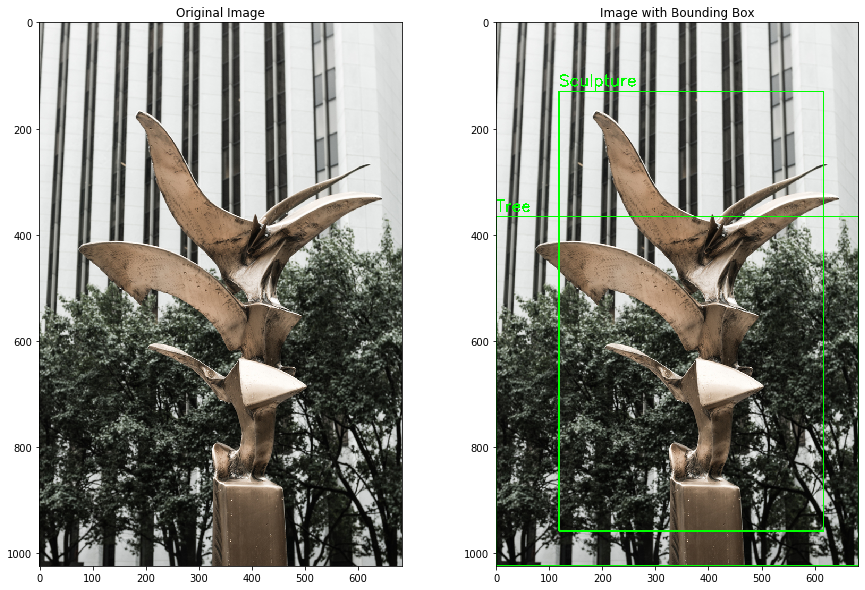

In [23]:
height, width, _ = img.shape
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_id = img_name[:16]
bboxs = annotations_bbox[annotations_bbox['ImageID']==img_id]
img_bbox = img.copy()
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    class_series = class_descriptions[class_descriptions['name']==label_name]
    class_name = class_series['class'].values[0]
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)
plt.show()

### Get image classes for Ingredients
**Ingredient classes:**  
Milk, Egg, Bread, Cream, Cheese, Shrimp, Coconut, Pasta, Mushroom, Apple, Tomato, Cucumber, Bell pepper, Potato, Pumpkin, Broccoli.    
(*max* 1000 images for each class)

In [121]:
milk_pd = class_descriptions[class_descriptions['class']=='Milk']
egg_pd = class_descriptions[class_descriptions['class']=='Egg (Food)']
bread_pd = class_descriptions[class_descriptions['class']=='Bread']
cream_pd = class_descriptions[class_descriptions['class']=='Cream']
cheese_pd = class_descriptions[class_descriptions['class']=='Cheese']
shrimp_pd = class_descriptions[class_descriptions['class']=='Shrimp']
coconut_pd = class_descriptions[class_descriptions['class']=='Coconut']
pasta_pd = class_descriptions[class_descriptions['class']=='Pasta']
mushroom_pd = class_descriptions[class_descriptions['class']=='Mushroom']
apple_pd = class_descriptions[class_descriptions['class']=='Apple']
tomato_pd = class_descriptions[class_descriptions['class']=='Tomato']
cucumber_pd = class_descriptions[class_descriptions['class']=='Cucumber']
bell_pepper_pd = class_descriptions[class_descriptions['class']=='Bell pepper']
potato_pd = class_descriptions[class_descriptions['class']=='Potato']
pumpkin_pd = class_descriptions[class_descriptions['class']=='Pumpkin']
broccoli_pd = class_descriptions[class_descriptions['class']=='Broccoli']

label_name_milk = milk_pd['name'].values[0]
label_name_egg = egg_pd['name'].values[0]
label_name_bread = bread_pd['name'].values[0]
label_name_cream = cream_pd['name'].values[0]
label_name_cheese = cheese_pd['name'].values[0]
label_name_shrimp = shrimp_pd['name'].values[0]
label_name_coconut = coconut_pd['name'].values[0]
label_name_pasta = pasta_pd['name'].values[0]
label_name_mushroom = mushroom_pd['name'].values[0]
label_name_apple = apple_pd['name'].values[0]
label_name_tomato = tomato_pd['name'].values[0]
label_name_cucumber = cucumber_pd['name'].values[0]
label_name_bell_pepper = bell_pepper_pd['name'].values[0]
label_name_potato = potato_pd['name'].values[0]
label_name_pumpkin = pumpkin_pd['name'].values[0]
label_name_broccoli = broccoli_pd['name'].values[0]

In [122]:
milk_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_milk]
egg_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_egg]
bread_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_bread]
cream_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_cream]
cheese_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_cheese]
shrimp_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_shrimp]
coconut_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_coconut]
pasta_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_pasta]
mushroom_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_mushroom]
apple_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_apple]
tomato_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_tomato]
cucumber_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_cucumber]
bell_pepper_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_bell_pepper]
potato_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_potato]
pumpkin_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_pumpkin]
broccoli_bbox = annotations_bbox[annotations_bbox['LabelName']==label_name_broccoli]

**Get unique image ids for each class**

In [132]:
milk_img_id = np.unique(milk_bbox['ImageID'])
egg_img_id = np.unique(egg_bbox['ImageID'])
bread_img_id = np.unique(bread_bbox['ImageID'])
cream_img_id = np.unique(cream_bbox['ImageID'])
cheese_img_id = np.unique(cheese_bbox['ImageID'])
shrimp_img_id = np.unique(shrimp_bbox['ImageID'])
coconut_img_id = np.unique(coconut_bbox['ImageID'])
pasta_img_id = np.unique(pasta_bbox['ImageID'])
mushroom_img_id = np.unique(mushroom_bbox['ImageID'])
apple_img_id = np.unique(apple_bbox['ImageID'])
tomato_img_id = np.unique(tomato_bbox['ImageID'])
cucumber_img_id = np.unique(cucumber_bbox['ImageID'])
bell_pepper_img_id = np.unique(bell_pepper_bbox['ImageID'])
potato_img_id = np.unique(potato_bbox['ImageID'])
pumpkin_img_id = np.unique(pumpkin_bbox['ImageID'])
broccoli_img_id = np.unique(broccoli_bbox['ImageID'])

print('Number of milk images: %d' % (len(milk_img_id)))
print('Number of egg images: %d' % (len(egg_img_id)))
print('Number of bread images: %d' % (len(bread_img_id)))
print('Number of cream images: %d' % (len(cream_img_id)))
print('Number of cheese images: %d' % (len(cheese_img_id)))
print('Number of shrimp images: %d' % (len(shrimp_img_id)))
print('Number of coconut images: %d' % (len(coconut_img_id)))
print('Number of pasta images: %d' % (len(pasta_img_id)))
print('Number of mushroom images: %d' % (len(mushroom_img_id)))
print('Number of apple images: %d' % (len(apple_img_id)))
print('Number of tomato images: %d' % (len(tomato_img_id)))
print('Number of cucumber images: %d' % (len(cucumber_img_id)))
print('Number of bell_pepper images: %d' % (len(bell_pepper_img_id)))
print('Number of potato images: %d' % (len(potato_img_id)))    
print('Number of pumpkin images: %d' % (len(pumpkin_img_id))) 
print('Number of broccoli images: %d' % (len(broccoli_img_id)))

Number of milk images: 156
Number of egg images: 934
Number of bread images: 1717
Number of cream images: 70
Number of cheese images: 503
Number of shrimp images: 617
Number of coconut images: 382
Number of pasta images: 734
Number of mushroom images: 1782
Number of apple images: 1078
Number of tomato images: 1283
Number of cucumber images: 454
Number of bell_pepper images: 380
Number of potato images: 304
Number of pumpkin images: 1705
Number of broccoli images: 475


In [133]:
# Testing images

# img_url = images_boxable.loc[images_boxable['image_name'] == pumpkin_img_id[random.randrange(len(pumpkin_img_id))]+'.jpg', 'image_url'] 
# img = io.imread(img_url.iloc[0])
# plt.figure(figsize=(15,10))
# plt.subplot(1,2,1)
# plt.title('Original Image')
# plt.imshow(img)

randomly pick 1000 images for classes with more than 1000 images

In [134]:
random.seed(1)
random.shuffle(bread_img_id)
random.shuffle(mushroom_img_id)
random.shuffle(apple_img_id)
random.shuffle(tomato_img_id)
random.shuffle(pumpkin_img_id)

n = 1000
bread_img_id = bread_img_id[:n]
mushroom_img_id = mushroom_img_id[:n]
apple_img_id = apple_img_id[:n]
tomato_img_id = tomato_img_id[:n]
pumpkin_img_id = pumpkin_img_id[:n]

In [136]:
print('Number of bread images: %d' % (len(bread_img_id)))
print('Number of mushroom images: %d' % (len(mushroom_img_id)))
print('Number of apple images: %d' % (len(apple_img_id)))
print('Number of tomato images: %d' % (len(tomato_img_id))) 
print('Number of pumpkin images: %d' % (len(pumpkin_img_id))) 

Number of bread images: 1000
Number of mushroom images: 1000
Number of apple images: 1000
Number of tomato images: 1000
Number of pumpkin images: 1000


In [161]:
# get image URLs
milk_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in milk_img_id]
egg_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in egg_img_id]
bread_img_url =[images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in bread_img_id]
cream_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in cream_img_id]
cheese_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in cheese_img_id]
shrimp_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in shrimp_img_id]
coconut_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in coconut_img_id]
pasta_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in pasta_img_id]
mushroom_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in mushroom_img_id]
apple_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in apple_img_id]
tomato_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in tomato_img_id]
cucumber_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in cucumber_img_id]
bell_pepper_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in bell_pepper_img_id]
potato_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in potato_img_id]
pumpkin_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in pumpkin_img_id]
broccoli_img_url = [images_boxable[images_boxable['image_name']==name+'.jpg']['image_url'].values[0] for name in broccoli_img_id]

In [166]:
urls = [milk_img_url, egg_img_url, bread_img_url, cream_img_url, cheese_img_url, shrimp_img_url, coconut_img_url, pasta_img_url, mushroom_img_url, apple_img_url, tomato_img_url, cucumber_img_url, bell_pepper_img_url, potato_img_url, pumpkin_img_url, broccoli_img_url]
urls[0][1]

'https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/train/007a1f6f6276bad8.jpg'

In [167]:
saved_dirs = [os.path.join(base_path,'Milk'), os.path.join(base_path,'Egg'), os.path.join(base_path,'Bread'), os.path.join(base_path,'Cream'), os.path.join(base_path,'Cheese'), os.path.join(base_path,'Shrimp'), os.path.join(base_path,'Coconut'), os.path.join(base_path,'Pasta'), os.path.join(base_path,'Mushroom'), os.path.join(base_path,'Apple'), os.path.join(base_path,'Tomato'), os.path.join(base_path,'Cucumber'), os.path.join(base_path,'Bell pepper'), os.path.join(base_path,'Potato'), os.path.join(base_path,'Pumpkin'), os.path.join(base_path,'Broccoli')]
classes = ['Milk', 'Egg', 'Bread', 'Cream', 'Cheese', 'Shrimp', 'Coconut', 'Pasta', 'Mushroom', 'Apple', 'Tomato', 'Cucumber', 'Bell pepper', 'Potato', 'Pumpkin', 'Broccoli']

print(saved_dirs)

['Dataset/Open Images Dataset v5/Milk', 'Dataset/Open Images Dataset v5/Egg', 'Dataset/Open Images Dataset v5/Bread', 'Dataset/Open Images Dataset v5/Cream', 'Dataset/Open Images Dataset v5/Cheese', 'Dataset/Open Images Dataset v5/Shrimp', 'Dataset/Open Images Dataset v5/Coconut', 'Dataset/Open Images Dataset v5/Pasta', 'Dataset/Open Images Dataset v5/Mushroom', 'Dataset/Open Images Dataset v5/Apple', 'Dataset/Open Images Dataset v5/Tomato', 'Dataset/Open Images Dataset v5/Cucumber', 'Dataset/Open Images Dataset v5/Bell pepper', 'Dataset/Open Images Dataset v5/Potato', 'Dataset/Open Images Dataset v5/Pumpkin', 'Dataset/Open Images Dataset v5/Broccoli']


**Download images**

In [168]:
# Download images
for i in range(len(classes)):
    # Create directory
    os.mkdir(saved_dirs[i])
    saved_dir = saved_dirs[i]
    for url in urls[i]:
        img = io.imread(url)
        saved_path = os.path.join(saved_dir, url[-20:])
        io.imsave(saved_path, img)

**Format data for Faster R-CNN**  
(fname_path, xmin, xmax, ymin, ymax, class_name)  


In [169]:
# Save images to train and test directory
train_path = os.path.join(base_path, 'train')
os.mkdir(train_path)
test_path = os.path.join(base_path, 'test')
os.mkdir(test_path)

for i in range(len(classes)):
    
    all_imgs = os.listdir(os.path.join(base_path, classes[i]))
    all_imgs = [f for f in all_imgs if not f.startswith('.')]
    random.seed(1)
    random.shuffle(all_imgs)
    
    train_imgs = all_imgs[:800]
    test_imgs = all_imgs[800:]
    
    # Copy each classes' images to train directory
    for j in range(len(train_imgs)):
        original_path = os.path.join(os.path.join(base_path, classes[i]), train_imgs[j])
        new_path = os.path.join(train_path, train_imgs[j])
        copyfile(original_path, new_path)
    
    # Copy each classes' images to test directory
    for j in range(len(test_imgs)):
        original_path = os.path.join(os.path.join(base_path, classes[i]), test_imgs[j])
        new_path = os.path.join(test_path, test_imgs[j])
        copyfile(original_path, new_path)

In [170]:
print('Training images: ', len(os.listdir(train_path))) # subtract one because there is one hidden file named '.DS_Store'
print('Test images: ', len(os.listdir(test_path)))

Training images:  8705
Test images:  1133


In [171]:
label_names = [label_name_milk, label_name_egg, label_name_bread, label_name_cream, label_name_cheese, label_name_shrimp, 
               label_name_coconut, label_name_pasta, label_name_mushroom, label_name_apple, label_name_tomato, label_name_cucumber, 
               label_name_bell_pepper, label_name_potato, label_name_pumpkin, label_name_broccoli]

train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                train_df = train_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)


In [174]:
test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations_bbox[annotations_bbox['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        for i in range(len(label_names)):
            if labelName == label_names[i]:
                test_df = test_df.append({'FileName': img_name, 
                                            'XMin': row['XMin'], 
                                            'XMax': row['XMax'], 
                                            'YMin': row['YMin'], 
                                            'YMax': row['YMax'], 
                                            'ClassName': classes[i]}, 
                                           ignore_index=True)

In [175]:
train_df.to_csv(os.path.join(base_path, 'train.csv'))
test_df.to_csv(os.path.join(base_path, 'test.csv'))

**Write** `train.csv` **to** `annotation.txt` for Google Colab

In [178]:
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# For training
f= open(base_path + "/annotation.txt","w+")
for idx, row in train_df.iterrows():
    sys.stdout.write(str(idx) + '\r')
    sys.stdout.flush()
    img = cv2.imread((base_path + '/train/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    google_colab_file_path = 'drive/My Drive/Machine Learning/Dataset/Open Images Dataset v5/train'
    fileName = os.path.join(google_colab_file_path, row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()

In [180]:
test_df = pd.read_csv(os.path.join(base_path, 'test.csv'))

# For test
f= open(base_path + "/test_annotation.txt","w+")
for idx, row in test_df.iterrows():
    sys.stdout.write(str(idx) + '\r')
    sys.stdout.flush()
    img = cv2.imread((base_path + '/test/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    google_colab_file_path = 'drive/My Drive/Machine Learning/Dataset/Open Images Dataset v5/test'
    fileName = os.path.join(google_colab_file_path, row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()